In [ ]:
## 若在 Colab 上執行請反註解

#### 掛接 Google 雲端硬碟 ####
#from google.colab import drive
#drive.mount('/content/drive')

####　切換工作資料夾的目錄 ####
## root 需要更改成 自己的 資料夾路徑，並資料夾內放 所有 *.py 與 *.ipynb 的檔案。
#root = "/content/drive/MyDrive/Colab Notebooks/GCN-Spanning-Tree"
#import os
#os.chdir(root)

In [1]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import matplotlib.pyplot as plt

# 需要有 graph_adj.py 檔在目錄下
from graph_adj import get_dict_fn_line_adj, get_dict_fn_p4_adj

# 畫 2D網格 類型的 鄰接矩陣adj
def show_graph(adj,
               rows,
               cols,
               w=10,
               h=10,
               with_labels=True,
               alpha=1.0,
               padding=0.5,
               node_color='#8888FF',
               node_size=1000,
               node_shape='o',
               edge_color='#000000',
               edge_width=1.0,
               edge_style='solid',
               font_color='#000000',
               font_size=12):
    adj = sp.coo_matrix(adj)
    G = nx.from_scipy_sparse_matrix(adj)
    z = np.mgrid[0:rows, 0:cols].reshape(2, rows * cols).T
    pos = {}
    for i, (y, x) in zip(list(G.nodes), z):
        pos[i] = (x, -y)
    fig, ax = plt.subplots(figsize=(w, h))
    nx.draw(G,
            ax=ax,
            pos=pos,
            with_labels=with_labels,
            node_color=node_color,
            node_size=node_size,
            node_shape=node_shape,
            edge_color=edge_color,
            width=edge_width,
            style=edge_style,
            font_color=font_color,
            font_size=font_size)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xlim(left=xmin - padding, right=xmax + padding)
    ax.set_ylim(bottom=ymin - padding, top=ymax + padding)
    plt.close()
    return fig

# 鄰接矩陣adj 代號說明

In [2]:
# from graph_adj import get_dict_fn_line_adj, get_dict_fn_p4_adj

#說明: get_dict_fn_line_adj() 為 產生【直線型+四連通+八連通】的 鄰接矩陣adj
print(f"line_adj: { list(get_dict_fn_line_adj().keys()) }\n")

#說明: get_dict_fn_p4_adj() 為 產生【遞迴型】的 鄰接矩陣adj
print(f"p4_adj: { list(get_dict_fn_p4_adj().keys()) }\n")


# 單純 為 合併 以上兩個的函數
def get_dict_fn_adj():
    dict_fn_adj = {}
    dict_fn_adj.update(get_dict_fn_line_adj())
    dict_fn_adj.update(get_dict_fn_p4_adj())
    return dict_fn_adj


# 所有可以使用的 鄰接矩陣
print(f"image_adjs: { list(get_dict_fn_adj().keys()) }")

# 四連通、八連通: ['4C', '8C']
# 直線型: ['0', '90', '45', '135', '22.5', '67.5', '112.5', '157.5']
# 遞迴型: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']

line_adj: ['0', '90', '45', '135', '22.5', '67.5', '112.5', '157.5', '4C', '8C']

p4_adj: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']

image_adjs: ['0', '90', '45', '135', '22.5', '67.5', '112.5', '157.5', '4C', '8C', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']


# 顯示 鄰接矩陣adj 的 畫圖

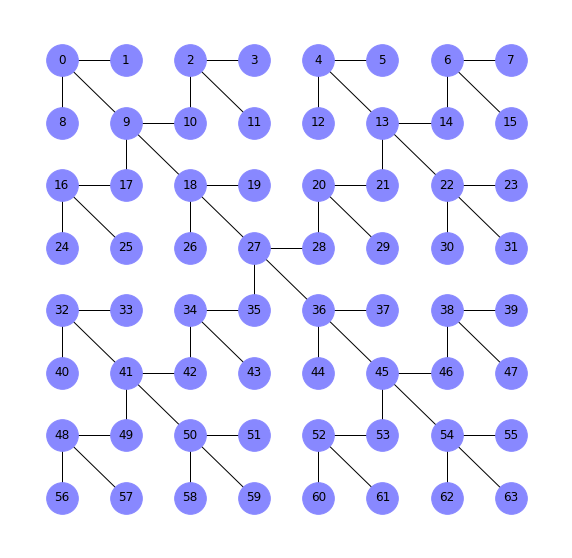

In [7]:
dict_fn_adj = get_dict_fn_adj()

# 【參數輸入】
rows = 8
cols = 8
image_adj = 'a'

# 【顯示圖片並儲存】
adj = dict_fn_adj[image_adj](rows, cols)
fig = show_graph(adj,
                 rows,
                 cols,
                 w=10,
                 h=10,
                 with_labels=True,
                 alpha=1.0,
                 padding=0.5,
                 node_color='#8888FF',
                 node_size=1000,
                 node_shape='o',
                 edge_color='#000000',
                 edge_width=1.0,
                 edge_style='solid',
                 font_color='#000000',
                 font_size=12)
fig.savefig(f"adj_{rows}_{cols}_{image_adj}.png",
            bbox_inches='tight',
            dpi=300,
            pad_inches=0.0)

fig 